<a href="https://colab.research.google.com/github/Mayur-666/Computer_Vision/blob/main/Project_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from google.colab import userdata

In [ ]:
path  = userdata.get('path')
# print(path)

# Load the dataset
data = pd.read_csv(path)
# print(data)

# Separate features and target variable
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8823529411764706
Classification Report:
              precision    recall  f1-score   support

     Absence       0.88      0.93      0.90        40
    Presence       0.88      0.82      0.85        28

    accuracy                           0.88        68
   macro avg       0.88      0.87      0.88        68
weighted avg       0.88      0.88      0.88        68



In [ ]:
# Encode target variable
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

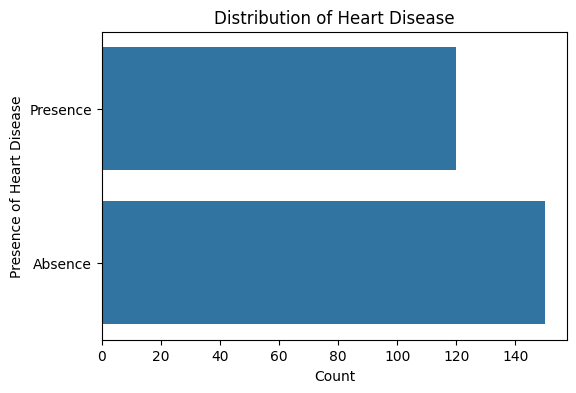

In [ ]:
# Visualizations
# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(label_encoder.inverse_transform(data['Heart Disease']))
plt.title('Distribution of Heart Disease')
plt.ylabel('Presence of Heart Disease')
plt.xlabel('Count')
plt.show()

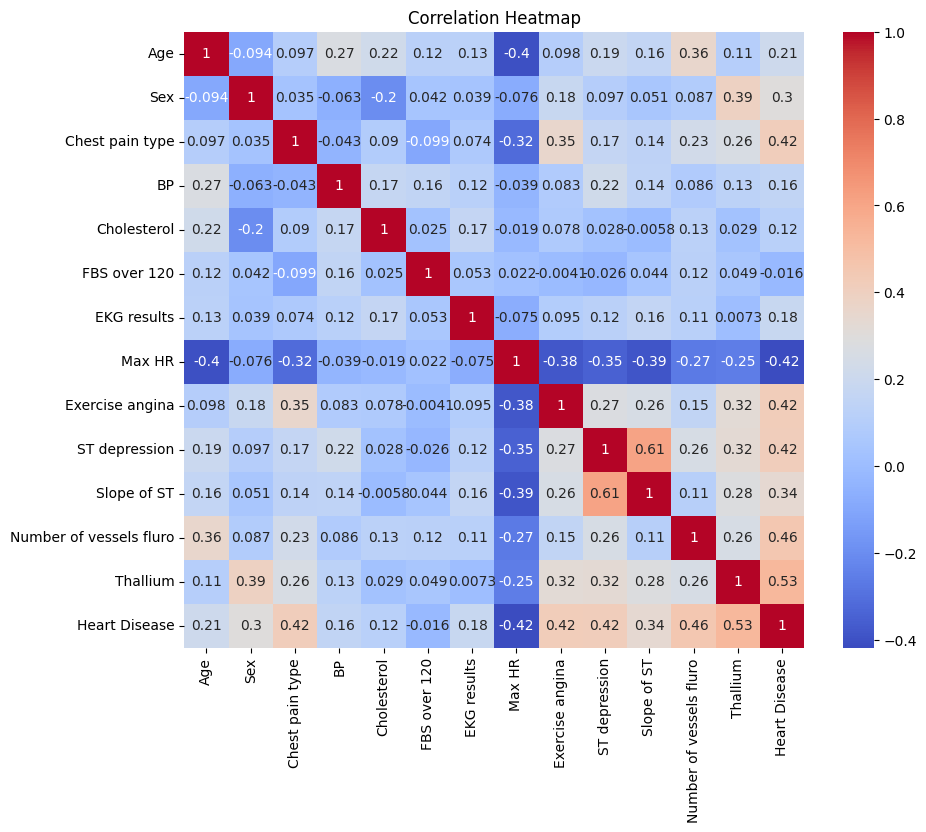

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: ylabel='Feature'>

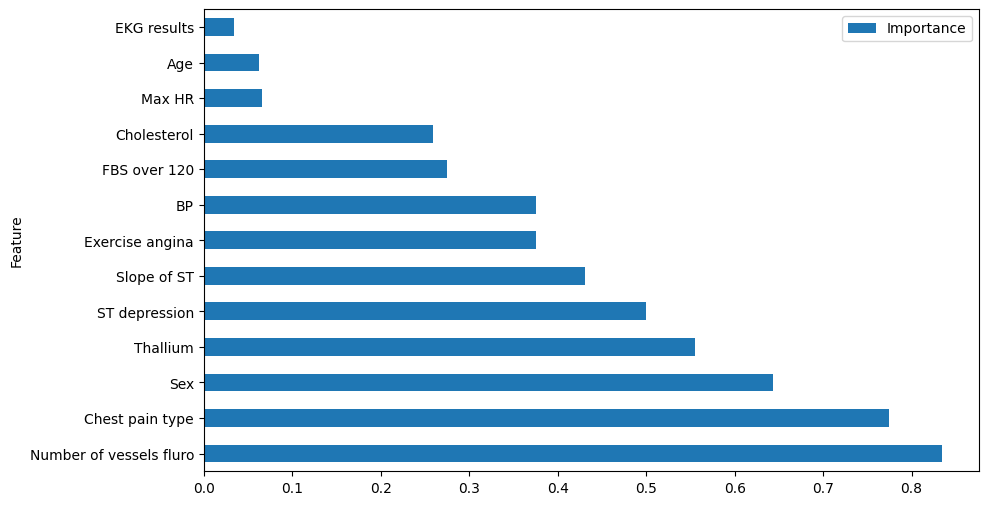

In [ ]:
coeff = model.coef_[0]
feature_imp = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coeff)})
feature_imp = feature_imp.sort_values('Importance' , ascending=False)
feature_imp.plot(x='Feature', y="Importance", kind= 'barh', figsize=(10,6))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


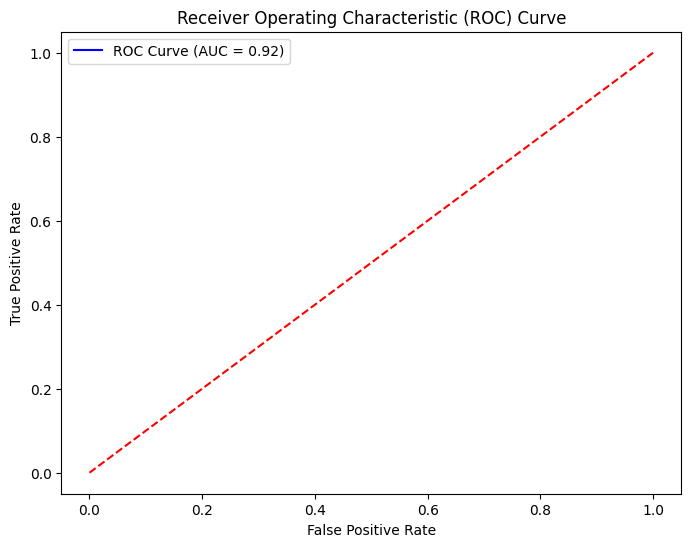

In [ ]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

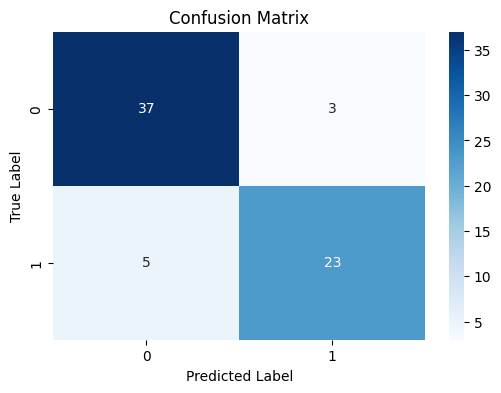

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)
new_predictions2 = model.predict(X_test_smote)

print(new_predictions2)

# evaluating the predictions with ground truth labels
new_accuracy = accuracy_score(y_test_smote, new_predictions2)

print("New Data Accuracy:", new_accuracy)

['Presence' 'Presence' 'Absence' 'Absence' 'Absence' 'Presence' 'Presence'
 'Absence' 'Absence' 'Absence' 'Absence' 'Presence' 'Presence' 'Presence'
 'Absence' 'Absence' 'Absence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Absence' 'Presence' 'Absence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Absence' 'Absence' 'Absence' 'Absence' 'Presence' 'Absence' 'Absence'
 'Presence' 'Presence' 'Absence' 'Presence' 'Absence' 'Absence' 'Absence'
 'Absence' 'Absence' 'Absence' 'Absence' 'Absence' 'Presence' 'Presence'
 'Absence' 'Absence' 'Absence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Absence' 'Presence' 'Absence' 'Absence' 'Presence' 'Presence' 'Presence'
 'Presence' 'Presence' 'Absence' 'Absence' 'Absence' 'Presence' 'Presence'
 'Presence' 'Presence' 'Presence' 'Presence' 'Presence' 'Presence'
 'Presence' 'Presence' 'Absence' 'Presence']
New Data Accuracy: 0.8875
